# Democracy and Economic Well-Being

## My Research Question & Hypothesis

For this research project I will be exploring what is the relationship between the level of openness of a society and the economic well-being of the citizens. My hypothesis is that countries with a more open society will have a higher level of economic well-being.

## Literature Review

In Why Nations Fail1, Daron Acemoglu and James Robinson explain that economic prosperity depends above all on the inclusiveness of economic and political institutions.  This is in contrast to classical economics which explain the difference in economic well-being using factors like land, labor and capita.  I have previously read this book and hope that my research can confirm or deny their thesis.

John Gerring’s “Democracy and economic growth: A historical perspective” explained that recent studies appear to show that democracy has no robust association with economic growth (economic growth is viewed as the engine to increase economic well-being).  They argue that democracy must be understood as a stock, rather than a level, measure.  Unfortuantely because I only have one year of data I will not be able to address this concern.

## Data Used

The data I will be using is a subset of the Gapminder Project’s data. This section will describe the data in more detail:

### Economic Well-Being
In order to measure the economic well-being I will be using GDP per capita data.  This originally came from the World Bank.  It is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.  The data are in constant 2000 US Dollars.  The GapMinder data set that I will be analyzing is the 2010 GDP per capita.

### Level of Openness
In order to measure the level of openness of a society I will be using the democracy score as a proxy.  The more democratic a society is, the more open it is.  The democracy score comes from the Polity IV project.  It is a summary measure of a country's democratic and free nature. -10 is the lowest value, 10 the highest.  The GapMinder data set that I will analyzing is the polity score for 2009.  To get a feel for this data take a look at the following figure provided by the Polity IV project authors:

![polity categories](http://www.systemicpeace.org/polity/demmap13.jpg)

## Data Mangement
I begin by importing the libraries needed for the analysis:

In [1]:
%matplotlib inline
# Import libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Now I have python parse the csv file and print out some basic statistics about the data frame (df):

In [2]:
# Read in the GapMinder Data
print('Reading in GapMinder data')
df = pd.read_csv('gapminder.csv', low_memory=False)
# Print some basic statistics about the GapMinder data
print('Number of observations: '+ str(len(df)) +' (rows)')
print('Number of variables: '+ str(len(df.columns)) +' (columns)')

Reading in GapMinder data
Number of observations: 213 (rows)
Number of variables: 16 (columns)


There are 213 observations with 16 variables in the data frame.  I will change the data type:

In [3]:
# Change the data type for variables of interest
df['polityscore'] = df['polityscore'].convert_objects(convert_numeric=True)
df['incomeperperson'] = df['incomeperperson'].convert_objects(convert_numeric=True)

I want to see how many missing observations there are in the variables of interest:

In [4]:
# Print out the counts of valid and missing rows
print ('Countries with a Democracy Score: ' + str(df['polityscore'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['polityscore'].count()) + ' missing)')
print ('Countries with a GDP Per Capita: ' + str(df['incomeperperson'].count()) + ' out of ' + str(len(df)) + ' (' + str(len(df) - df['incomeperperson'].count()) + ' missing)')

Countries with a Democracy Score: 161 out of 213 (52 missing)
Countries with a GDP Per Capita: 190 out of 213 (23 missing)


I need to have a set of data with both variables of interest so I will subset the data frame:

In [5]:
# Get the rows not missing a value
print('Dropping rows with missing democracy score and per capita GDP')
subset = df[np.isfinite(df['polityscore'])]
subset = subset[np.isfinite(subset['incomeperperson'])]
print('Number of observations: '+ str(len(subset)) +' (rows)')
print('Number of variables: '+ str(len(subset.columns)) +' (columns)')

Dropping rows with missing democracy score and per capita GDP
Number of observations: 155 (rows)
Number of variables: 16 (columns)


155 of the 213 records have complete data.  Now I will drop the unneeded variables from the merged data frame:

In [6]:
# Drop unneeded columns
print('Dropping unneeded variables')
drops = ['country', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate']
subset.drop(drops,inplace=True,axis=1)
# Print more statistics
print('Number of observations: '+ str(len(subset)) +' (rows)')
print('Number of variables: '+ str(len(subset.columns)) +' (columns)')

Dropping unneeded variables
Number of observations: 155 (rows)
Number of variables: 2 (columns)


Now I will create my new variable for the democracy score categories.  I will do this by defining a function and then using that function to create the new variable:

In [7]:
# This function converts the polity score to a category
def convert_polityscore_to_category(score):
    if score == 10:
        return('1 - Full Democracy')
    elif score > 5:
        return('2 - Democracy')
    elif score > 0:
        return ('3 - Open Anocracy')
    elif score > -6:
        return ('4 - Closed Anocracy')
    else:
        return('5 - Autocracy')

# Now we can use the function to create the new variable
subset['openness'] = subset['polityscore'].apply(convert_polityscore_to_category)
subset['openness'] = subset['openness'].astype('category')

I also need to make a change to the GDP per capita.  Since GDP per person is a continuous varible I will need to create a discrete one. For this assignment I will create quartiles:

In [8]:
# Create per capita GDP quartiles
print('Creating GDP per capita quartiles')
subset['incomequartiles'] = pd.cut(subset['incomeperperson'], 4, labels=['1 -  0% to 25%','2 - 25% to 50%','3 - 50% to 75%','4 - 75% to 100%'])
subset['incomequartiles'] = subset['incomequartiles'].astype('category')
print('Number of observations: '+ str(len(subset)) +' (rows)')
print('Number of variables: '+ str(len(subset.columns)) +' (columns)')

Creating GDP per capita quartiles
Number of observations: 155 (rows)
Number of variables: 4 (columns)


## Exploratory Data Analysis
### Univariate Analysis

#### Economic Well-Being

First let's take a look at the distribution of the economic well-being figure:

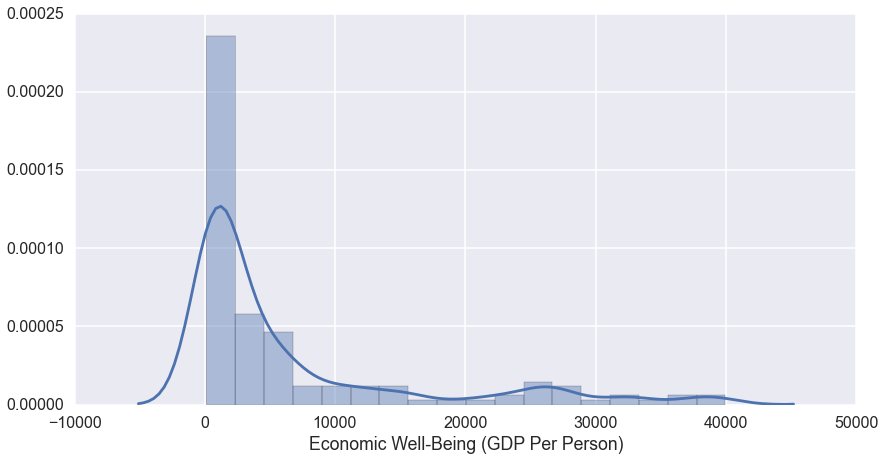

In [9]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.distplot(subset['incomeperperson'])
plt.xlabel('Economic Well-Being (GDP Per Person)')

The income per person is unimodal and right skewed.  There is a natural floor as it is not possible to have a negative GDP per person.  Now let's look at this measure using the summary statistics:

In [10]:
subset['incomeperperson'].describe()

count      155.000000
mean      6604.574358
std       9754.983733
min        103.775857
25%        576.388265
50%       2221.185664
75%       6661.178838
max      39972.352768
Name: incomeperperson, dtype: float64

Now let's look at this measure using the categorical quartiles:

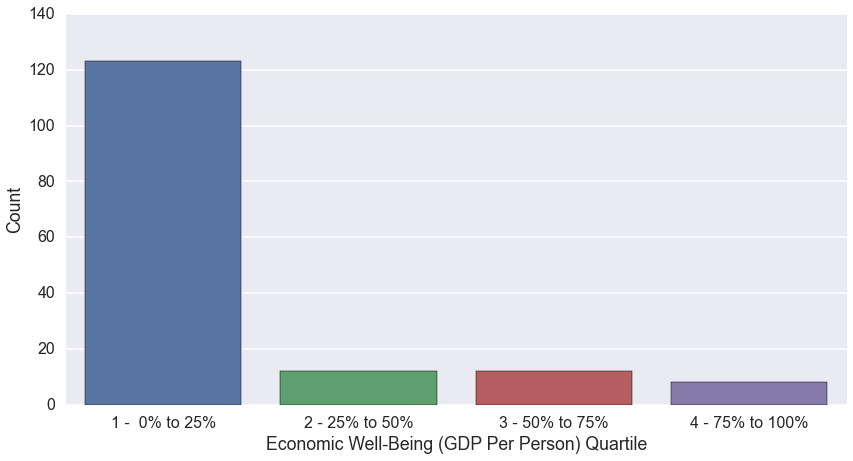

In [11]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='incomequartiles', data=subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person) Quartile')

In [12]:
income_quartile_counts = subset.groupby('incomequartiles').size()
print(income_quartile_counts)

incomequartiles
1 -  0% to 25%     123
2 - 25% to 50%      12
3 - 50% to 75%      12
4 - 75% to 100%      8
dtype: int64


#### Level of Openness
Now to observe the distribution in the level of openness:

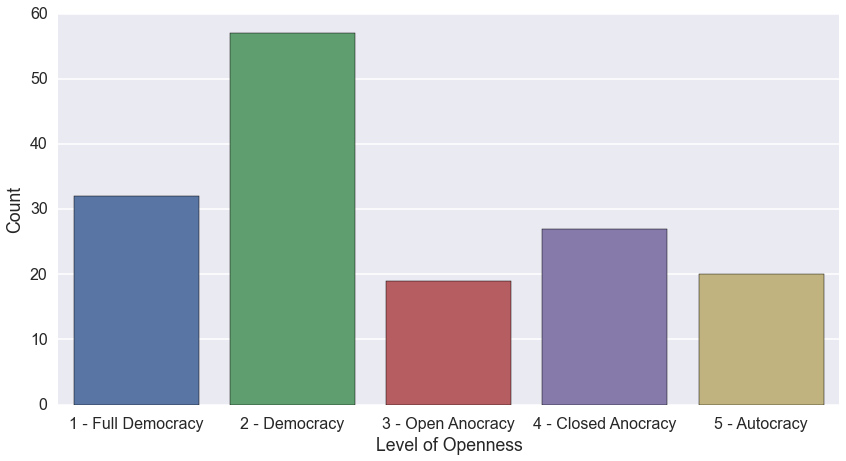

In [13]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='openness', data=subset)
plt.ylabel('Count')
plt.xlabel('Level of Openness')

In [14]:
openness_counts = subset.groupby('openness').size()
print('The Number of Countries by Openness')
print(openness_counts)

The Number of Countries by Openness
openness
1 - Full Democracy     32
2 - Democracy          57
3 - Open Anocracy      19
4 - Closed Anocracy    27
5 - Autocracy          20
dtype: int64


### Multivariate Analysis
#### Economic Well-Being by Level of Openness
Now that I have a sense of the relationship between the level of democracy and the continent I will examine the relationship between economic well-being and level of openness.  I will begin with an examination of mean per capita GDP by level of openness:

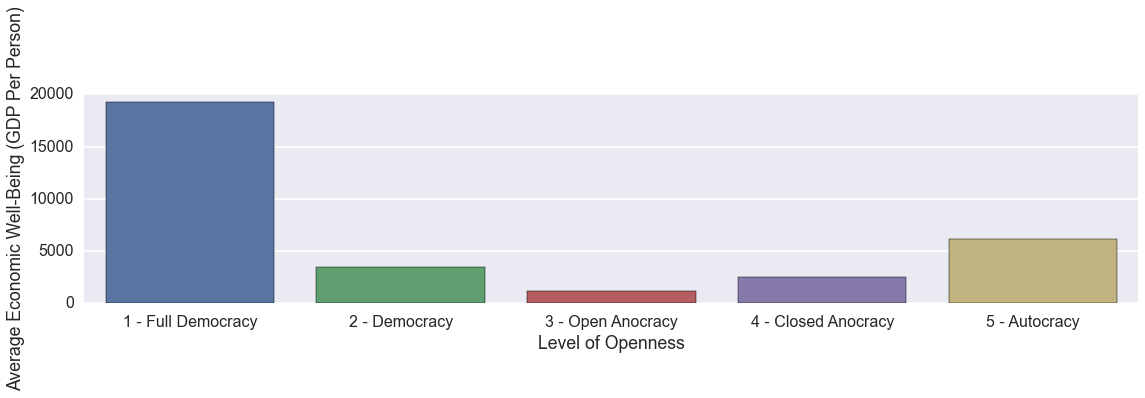

In [15]:
sns.factorplot(x='openness', y='incomeperperson', data=subset, kind='bar', ci=None, size=4, aspect=4)
plt.ylabel('Average Economic Well-Being (GDP Per Person)')
plt.xlabel('Level of Openness')

In [16]:
# Mean Well-Being by Level of Openness
print('GDP Statistics by Level of Openness')
gdp_mean = subset.groupby('openness')['incomeperperson'].agg([np.mean, np.std])
print(gdp_mean)

GDP Statistics by Level of Openness
                             mean           std
openness                                       
1 - Full Democracy   19290.403182  11585.710266
2 - Democracy         3424.612984   4891.795845
3 - Open Anocracy     1167.128903   1112.912373
4 - Closed Anocracy   2472.575659   6298.382567
5 - Autocracy         6113.909582   8416.873490


We observe that the countires that are most open (full democracies) have a higher average economic well-being than those who are the most closed(autocracy).  We see that the distribution is U shaped.  We are looking at mean income.  Let's visualize the median using a box plot:

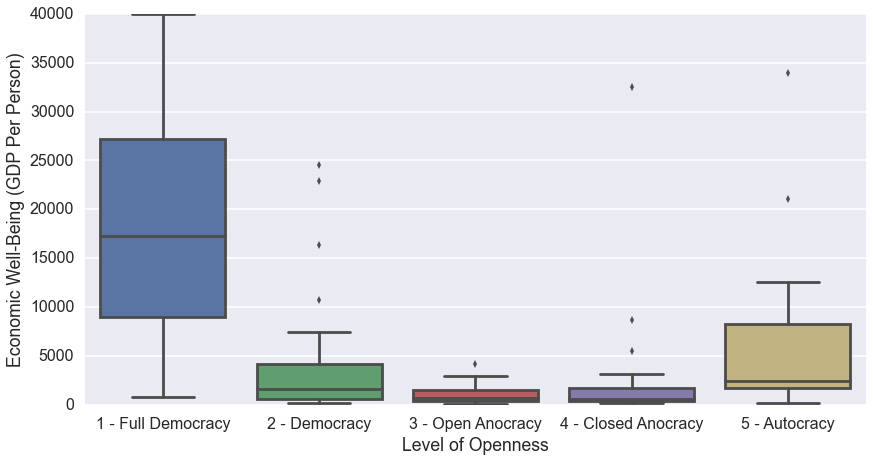

In [17]:
# Visualize data using a boxplot
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.boxplot(x='openness', y='incomeperperson', data=subset)
plt.ylabel('Economic Well-Being (GDP Per Person)')
plt.xlabel('Level of Openness')

I personally find the above visaulization very impactful.  One observes the higher level of economic well-being associated with the full democracy.  One also observes there are two outliers in the autocracy that are higher than the full democracy.  The U shape is once again apparent.  Here is the same data presented in tabular format:

In [18]:
print('GDP Statistics by Level of Openness')
stats = subset.groupby('openness')['incomeperperson'].describe()
print(stats)

GDP Statistics by Level of Openness
openness                  
1 - Full Democracy   count       32.000000
                     mean     19290.403182
                     std      11585.710266
                     min        772.933345
                     25%       8941.127098
                     50%      17222.013829
                     75%      27231.821530
                     max      39972.352768
2 - Democracy        count       57.000000
                     mean      3424.612984
                     std       4891.795845
                     min        115.305996
                     25%        561.708585
                     50%       1621.177078
                     75%       4189.436587
                     max      24496.048264
3 - Open Anocracy    count       19.000000
                     mean      1167.128903
                     std       1112.912373
                     min        103.775857
                     25%        381.246024
                     50%        66